# Lambda Presentation - Highly Imbalanced Classes in binary classification

## Edits from Q & A:
- Paper on undersampling majority class is often effective: “Class Imbalance, Redux”. Wallace, Small, Brodley and Trikalinos. IEEE Conf on Data Mining. 2011 https://ieeexplore.ieee.org/document/6137280
- Fraud dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud

This repository is organized into the following sections:
1. What are highly imbalanced classes?
2. Performance metrics
3. Sampling strategies to get more balanced data
4. Additional considerations

## 2min summary

- Classification is when you are trying to classify elements of a set. When there are two groups, it's binary classification. 
- If the event is really rare, there can be problems in building a machine learning model. 
- We should be concerned about how we evaluate our model and how we construct our training data. 
- Common examples include fraud, cancer, and device failure
    - Is a credit card transaction fraud or not fraud?
    - Will the device fail or not?

## 1. What are highly imbalanced classes and why is it a problem?

+ ### Section summary:
    + Binary classification
        + Minority class is the smaller class (fraud) and majority class is the bigger class (no fraud)
    + Supervised machine learning
        + Labeled training data (0's and 1's), many more 0's than 1's
    + Imbalanced data leads to poor model generalization
        + Your model may not work on new, previously unseen data
        + Overfitting

#### Class imbalance - What does it look like?
In a best case scenario as far as class balance is concerned, both classes would be equally represented, about 50% each. If we see something like the scatterplot below, we're probably in good shape as far as class balanced is concerned. Projected on a two dimensional plane, our classes are both separated and we have a good number of examples of both. Even visually, you can tell there are clear differences between these data. 

In [1]:
#Load packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#load datasets
iris = load_iris()
features = iris.data.T

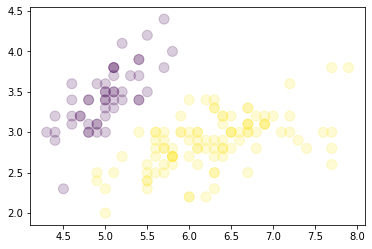

In [2]:
iris.target_balanced = np.where(iris.target==1, 2, iris.target)
plt.scatter(features[0], features[1], alpha=0.2, s=100, c= iris.target_balanced , cmap='viridis')

Conversely, here's a plot where there IS class imbalance. Visually, you can already probably infer some of the issues we'd have building a model using such a few examples of the minority class.

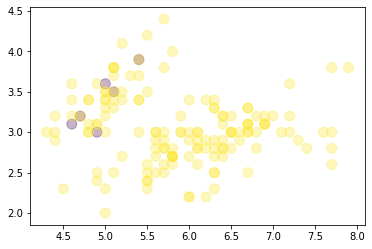

In [3]:
iris.target_imbalanced = iris.target_balanced
iris.target_imbalanced[6:] = 2

plt.scatter(features[0], features[1], alpha=0.3, s=100, c= iris.target_imbalanced , cmap='viridis')

Let's check out a model and see how to address class imbalance in action

In [3]:
# Load some data
data = 'C:/Users/VIgnesh/Desktop/dataset.csv'
df = pd.read_csv(data)

# preview of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# percentage of labels within the Class column
df['Class'].value_counts()/np.float(len(df))

0    0.998273
1    0.001727
Name: Class, dtype: float64

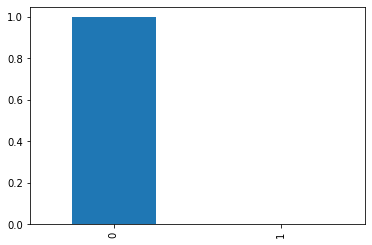

In [6]:
# view the distribution of percentages within the Class column
(df['Class'].value_counts()/np.float(len(df))).plot.bar()

## 2. Performance Metrics

+ ### Section summary:
    + Accuracy is misleading with imbalanced classes
        + You can have terrible performance with amazing accuracy
    + Choose the right metric
        + Align your performance metric to your specific business goal

There are many metrics for evaluating how good a binary classifier is doing in predicting the class labels for instances/examples. Below are some caveats and suggestions for choosing and interpreting the appropriate metrics.
Accuracy can be misleading. Since accuracy is simple the ratio of correctly predicted instances over all instances used for evaluation, it is possible to get a decent accuracy while having mostly incorrect predictions for the minority class. 


### Accuracy can be misleading!
Accuracy can be misleading. Since accuracy is the ratio of correctly predicted instances over all instances used for evaluation, you can have awesome accuracy while having mostly incorrect predictions for the minority class. How's that possible? 

Let's suppose you want to predict the liklihood somebody has some rare diseas. Suppose it happens .01% of the time. If you just classify EVERYONE as not having the disease, you'd be correct 99.99% of the time and have an accuracy of 99.99%!

![Accuracy](https://upload.wikimedia.org/math/8/c/3/8c3f5b1cef3a52644de5056fd2fafee6.png)


### ROC
A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings.

### Confusion matrix can be better
Confusion matrix helps break down the predictive performances on different classes.
![Confusion matrix](https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png)


### Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

So, precision is more concerned with the positive class than the negative class.

![Precision](https://upload.wikimedia.org/math/6/b/5/6b55614c9bcfa7596145265be222c4c9.png)


### Recall 
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

![Recall](https://upload.wikimedia.org/math/8/b/f/8bf211db6603570bbb1926f911097b18.png)

### F1-score 
F1 Score is needed when you want to seek a balance between Precision and Recall. We have previously seen that accuracy can be largely contributed by a large number of True Negatives which in most business circumstances, we do not focus on much whereas False Negative and False Positive usually has business costs (tangible & intangible) thus F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

![F1-score](https://upload.wikimedia.org/math/9/9/1/991d55cc29b4867c88c6c22d438265f9.png)


### Consider alternative metrics
Other performance metrics like log-loss may be appropriate. Log Loss takes into account the uncertainty of your prediction based on how much it varies from the actual label. 

### Always contextualize your model to the specific business objective
Give examples here where different metrics would be appropriate. 

In [5]:
X = df.drop(['Class'], axis=1)
y = df['Class']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# instantiate the Logistic Regression classifier
logreg = LogisticRegression(max_iter=300)

# fit the classifier to the imbalanced data
clf = logreg.fit(X_train, y_train)

# predict on the training data
y_pred = clf.predict(X_test)

In [6]:
# import the accuracy metric
from sklearn.metrics import accuracy_score


# print the accuracy
accuracy = accuracy_score(y_pred, y_test)

print("Accuracy : %.2f%%" % (accuracy * 100.0))

Accuracy : 99.89%


#### Ridiculously high accuracy 
You should be suspicious when your model performs this well...something is probably off.

Let's check that confusion matrix!

In [7]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

print('Confusion matrix:\n', cnf_matrix)

Confusion matrix:
 [[56851    13]
 [   50    48]]


![Confusion matrix](https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png)


Note that the TP dominate the confusion matrix in terms of numbetrs. This is a product of our highly imbalanced classes. We have 13 FP and 50 FN. Let's see how this breakdown translates into our precision, recall, and f1-scores. 

In [8]:
# import the metric
from sklearn.metrics import classification_report

# print classification report
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.49      0.60        98

    accuracy                           1.00     56962
   macro avg       0.89      0.74      0.80     56962
weighted avg       1.00      1.00      1.00     56962



## 3. Sampling strategies to get more balanced data


+ ### Section summary:
    + Up-sampling (Over sampling)
        + Resample from the minority class (replicate your fraud observations)
    + Down-sampling (Under sampling)
        + Don't use all observations from the majority class (get rid of some of your non-fraud observations)
    + Synthetic minority class data (SMOTE)
        + Interpolate between existing data and make new observations (Make up fake fraud observations)   
    + Many more sampling techniques implemented in [UnbalancedDataset](https://github.com/fmfn/UnbalancedDataset)
    
![SamplingPic](https://pic.fizzy.cc/img/20190718210444.png)

### SMOTE
![SmotePic](https://www.researchgate.net/publication/337724251/figure/fig2/AS:832195698626569@1575422324781/An-example-of-noise-propagation-in-SMOTE-where-x-denotes-the-selected-minority-class.png)
    
    

### Up-Sampling 
Upsampling is the process of randomly duplicating observations from the minority class in order to achieve a balanced dataset. So, it replicates the observations from minority class to balance the data. It is also known as upsampling. It may result in overfitting due to duplication of data points.

The most common way of over-sampling is to resample with replacement.

In [9]:
# import resample module 
from sklearn.utils import resample

# separate the minority and majority classes
df_majority = df[df['Class']==0]
df_minority = df[df['Class']==1]

df_minority_oversampled = resample(df_minority, replace=True, n_samples=284315, random_state=0)

# combine majority class with oversampled minority class
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

# display new class value counts
df_oversampled['Class'].value_counts()

1    284315
0    284315
Name: Class, dtype: int64

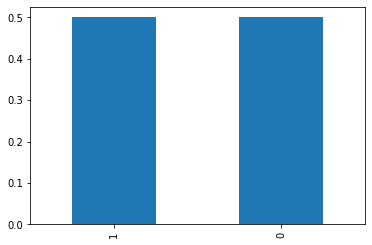

In [12]:
# view the distribution of percentages within the Class column
(df_oversampled['Class'].value_counts()/np.float(len(df_oversampled))).plot.bar()

In [10]:
X1 = df_oversampled.drop(['Class'], axis=1)
y1 = df_oversampled['Class']

#Split the data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# instantiate the Logistic Regression classifier
logreg1 = LogisticRegression(max_iter=300)

# fit the classifier to the imbalanced data
clf1 = logreg1.fit(X_train1, y_train1)


# predict on the Test data
y1_pred = clf1.predict(X_test1)


# print the accuracy
accuracy1 = accuracy_score(y1_pred, y_test1)

print("Accuracy : %.2f%%" % (accuracy1 * 100.0))

Accuracy : 94.61%


Wow! Our accuracy went down, but this is actually a good thing. Take a look at the other metrics:

In [11]:
print("Classification Report:\n\n", classification_report(y_test1, y1_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.97      0.95     56746
           1       0.96      0.93      0.95     56980

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



Our precision and recall is way up!!!

### Down-Sampling 
The under-sampling methods work with the majority class. In these methods, we randomly eliminate instances of the majority class. It reduces the number of observations from majority class to make the dataset balanced. This method is applicable when the dataset is huge and reducing the number of training samples make the dataset balanced.

The most common technique for under-sampling is resampling without replacement.


In [12]:
# separate the minority and majority classes
df_majority = df[df['Class']==0]
df_minority = df[df['Class']==1]

# undersample majority class
df_majority_undersampled = resample(df_majority, replace=True, n_samples=492, random_state=0)


# combine majority class with oversampled minority class
df_undersampled = pd.concat([df_minority, df_majority_undersampled])

# display new class value counts
df_undersampled['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [13]:
X2 = df_undersampled.drop(['Class'], axis=1)
y2 = df_undersampled['Class']

#Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# instantiate the Logistic Regression classifier
logreg2 = LogisticRegression(max_iter=300)

# fit the classifier to the imbalanced data
clf2 = logreg1.fit(X_train2, y_train2)


# predict on the Test data
y2_pred = clf2.predict(X_test2)


# print the accuracy
accuracy2 = accuracy_score(y2_pred, y_test2)

print("Accuracy : %.2f%%" % (accuracy2 * 100.0))

Accuracy : 92.39%


In [17]:
print("Classification Report:\n\n", classification_report(y_test2, y2_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.98      0.93        98
           1       0.98      0.87      0.92        99

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



Precision is even MORE up, but our recall dropped!

#### SMOTE - Synthetic Data

An altnernative to resasampling from the minority class is to synthesize new examples from the minority class. 

One technique for creating synthetic data is Synthetic Minority Oversampling Technique, or SMOTE for short. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.



In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 1)
X_sm, y_sm = smote.fit_sample(X, y)
print(X_sm.shape[0] - X.shape[0], 'New points created under SMOTE')

283823 New points created under SMOTE


In [15]:
#Split the data
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# instantiate the Logistic Regression classifier
logreg3 = LogisticRegression(max_iter=300)

# fit the classifier to the imbalanced data
clf3 = logreg1.fit(X_train3, y_train3)


# predict on the Test data
y3_pred = clf3.predict(X_test3)


# print the accuracy
accuracy3 = accuracy_score(y3_pred, y_test3)

print("Accuracy : %.2f%%" % (accuracy3 * 100.0))

Accuracy : 95.75%


In [16]:
print("Classification Report:\n\n", classification_report(y_test3, y3_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.97      0.96     56750
           1       0.97      0.95      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



Overall, our best model performance yet!

## 4. Additional Considerations
  + If your model meets your objective without any sampling strategies, DON'T USE ANY OF THESE TECHNIQUES. A simpler setup will likely be more robust and much easier to explain and defend.
  + If you can, just ask for more data. Identify the real reason you don't have enough minority class training examples. Is it cost? Is it time?
  + ALWAYS, align your strategy to the specific business objective. 
  + The Scikit-Learn package provides an integrated way to tackle this problem by setting up the class_weight='balance'.
 